In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
cols = [*range(11)] + [16, 17, 18]
songs = pd.read_csv('spotify_genres_v2.csv', low_memory=False, usecols=cols, dtype={'genre':'category', 'mode':'category'})
display(songs)
songs.info()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,124539,4,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,224427,4,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,98821,4,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,123661,3,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,123298,4,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,269208,4,hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,210112,4,hardstyle
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,234823,4,hardstyle
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,323200,4,hardstyle


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      42305 non-null  float64 
 1   energy            42305 non-null  float64 
 2   key               42305 non-null  int64   
 3   loudness          42305 non-null  float64 
 4   mode              42305 non-null  category
 5   speechiness       42305 non-null  float64 
 6   acousticness      42305 non-null  float64 
 7   instrumentalness  42305 non-null  float64 
 8   liveness          42305 non-null  float64 
 9   valence           42305 non-null  float64 
 10  tempo             42305 non-null  float64 
 11  duration_ms       42305 non-null  int64   
 12  time_signature    42305 non-null  int64   
 13  genre             42305 non-null  category
dtypes: category(2), float64(9), int64(3)
memory usage: 4.0 MB


In [16]:
songs.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580
std,0.156617,0.183823,3.666145,2.941165,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342
min,0.065100,0.000243,0.000000,-33.357000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000
50%,0.646000,0.803000,6.000000,-6.234000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000
75%,0.766000,0.923000,9.000000,-4.513000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000
max,0.988000,1.000000,11.000000,3.148000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000


In [20]:
songs.groupby('genre')['danceability'].agg(['mean', 'min', 'max']).sort_values('mean', ascending=False)

,mean,min,max
genre,,,
techhouse,0.786794,0.3680,0.988
Underground Rap,0.744658,0.2410,0.985
Rap,0.742877,0.2410,0.981
techno,0.715742,0.2540,0.978
Hiphop,0.698982,0.1970,0.988
Pop,0.676807,0.2090,0.935
RnB,0.674206,0.1910,0.978
Trap Metal,0.647564,0.0651,0.985
Dark Trap,0.618834,0.0979,0.985



### Поищем корреляции

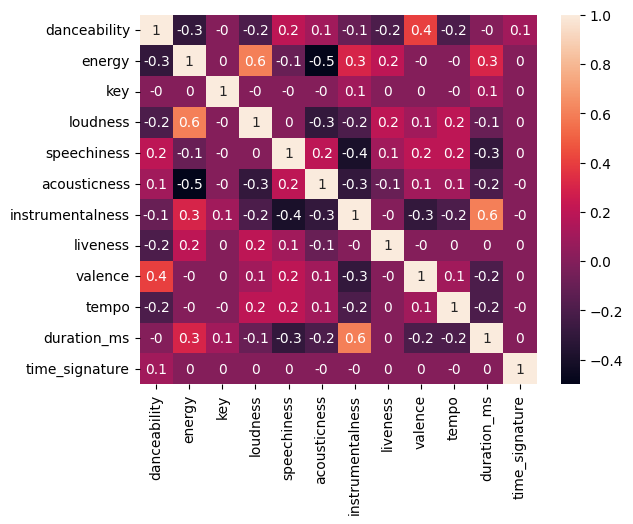

In [25]:
songs_corr = songs.corr().apply(lambda x: round(x, 1))
sns.heatmap(songs_corr, annot=True)
plt.show()

Корреляция 0.6 у двух пар:
- Energy-Loudness
- Duration-Instrumentalness

<b>Energy:</b>
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. 

<b>Loudness:</b>
The overall loudness of a track in decibels (dB).

<b>Duration:</b>
The duration of the track in milliseconds.

<b>Instrumentalness:</b>
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal".



Loudness vs. Energy

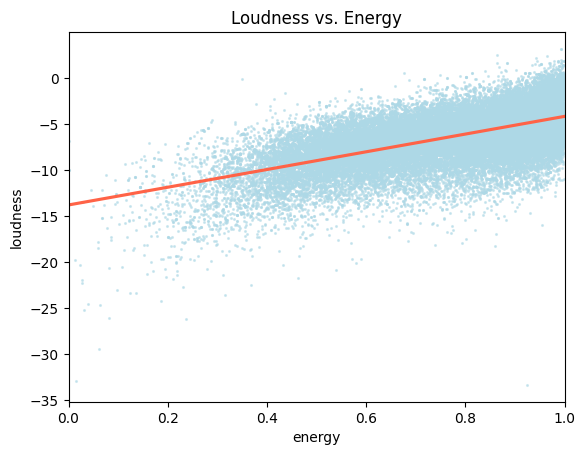

In [50]:
sns.regplot(x='energy',
            y='loudness',
            data=songs,
            ci=None,
            color='tomato',
            scatter_kws={'alpha': 0.5, 's': 1.5, 'color': 'lightblue'}).set(
            title='Loudness vs. Energy')
plt.xlim(0, 1)

plt.show()

Посмотрим, как отличаются эти характеристики по жанрам 

In [57]:
# energy
songs.groupby('genre')['energy'].agg(['mean', 'median','std']).sort_values('mean', ascending=False)

,mean,median,std
genre,,,
trap,0.906060,0.9400,0.098066
psytrance,0.902392,0.9340,0.093983
hardstyle,0.896238,0.9190,0.082729
trance,0.892435,0.9300,0.107369
dnb,0.873433,0.9010,0.097925
techhouse,0.834481,0.8730,0.131920
techno,0.795714,0.8225,0.141080
Emo,0.761175,0.8545,0.220404
Trap Metal,0.749157,0.7790,0.174147


In [85]:
trap_rnb = songs[songs['genre'].isin(['trap', 'RnB'])].copy()
trap_rnb['genre'] = trap_rnb['genre'].cat.remove_unused_categories()
trap_rnb['genre']

15937     RnB
15938     RnB
15939     RnB
15940     RnB
15941     RnB
         ... 
36398    trap
36399    trap
36400    trap
36401    trap
36402    trap
Name: genre, Length: 5086, dtype: category
Categories (2, object): ['RnB', 'trap']

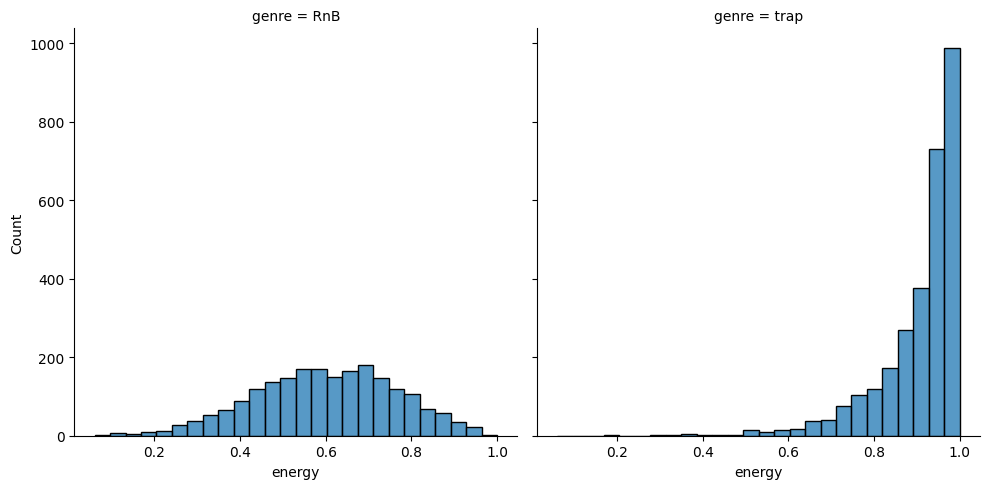

In [96]:
sns.displot(data=trap_rnb,
           x='energy',
           col='genre')

plt.show()

In [98]:
# loudness
songs.groupby('genre')['loudness'].agg(['mean', 'median','std']).sort_values('mean', ascending=False)

,mean,median,std
genre,,,
trap,-2.725578,-2.5350,1.946665
dnb,-4.063237,-3.9720,1.946063
hardstyle,-4.349444,-4.2460,1.589293
Emo,-5.433641,-4.7885,2.598227
Pop,-5.632072,-5.4230,1.947846
Trap Metal,-5.879087,-5.6125,3.038965
psytrance,-6.703383,-6.4750,1.585368
Rap,-6.887086,-6.6365,2.353116
RnB,-6.899896,-6.5310,2.518220


In [99]:
trap_techno = songs[songs['genre'].isin(['trap', 'techno'])].copy()
trap_techno['genre'] = trap_techno['genre'].cat.remove_unused_categories()

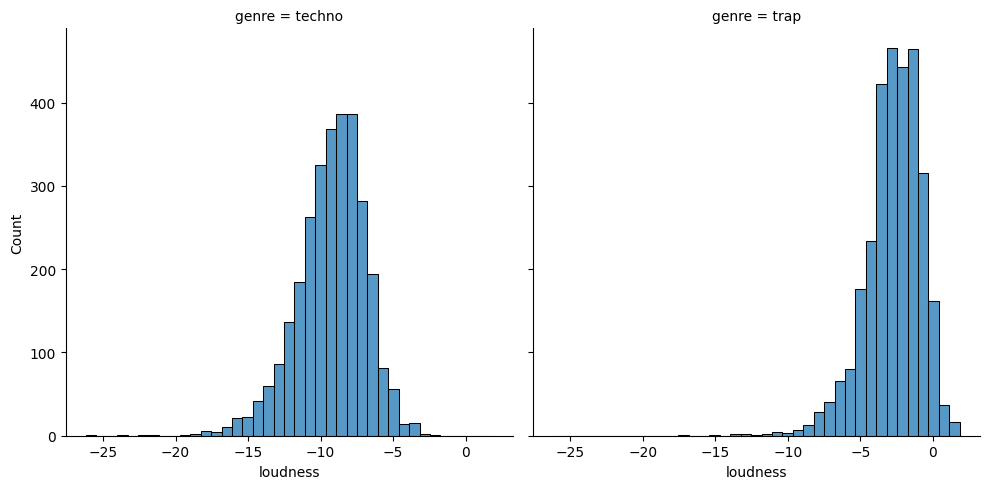

In [100]:
sns.displot(data=trap_techno,
           x='loudness',
           col='genre')

plt.show()

Duration (ms) vs. Instrumentalness

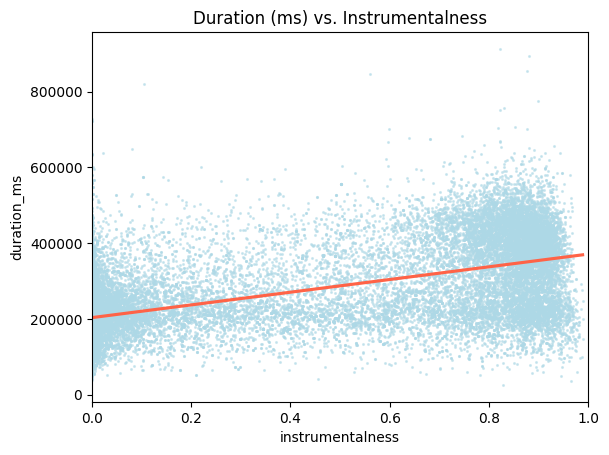

In [49]:
sns.regplot(x='instrumentalness',
            y='duration_ms',
            data=songs,
            ci=None,
            color='tomato',
            scatter_kws={'alpha': 0.5, 's': 1.5, 'color': 'lightblue'}).set(
            title='Duration (ms) vs. Instrumentalness')
plt.xlim(0, 1)

plt.show()